In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.signal import find_peaks


In [2]:
# List of years to read the files from
years = list(range(2016, 2024))

## CONDENDES THE DATA FILE TO AVERAGE THE DATA OVER AN HOUR: SCALE SIZE (1/60th)

# A list to hold the data frames for each year
dfs = []

for year in years:
    file_path = f'./data/dsc_fc_summed_spectra_{year}_v01.csv'
    data = pd.read_csv(file_path, header=None)

# Separate out datetime column (assuming it's the first column)
    datetime_col = data.iloc[:, 0]
    numeric_data = data.iloc[:, 1:]
    
    # Group by every 60 rows and take the mean for numeric columns
    numeric_avg = numeric_data.groupby(numeric_data.index // 60).mean()
    
    # For datetime column, just take the first value of each group
    datetime_avg = datetime_col.groupby(datetime_col.index // 60).first()
    
    # Combine the datetime and numeric averages
    combined_avg = pd.concat([datetime_avg, numeric_avg], axis=1)
    
    dfs.append(combined_avg)

# Concatenate all the data frames into one
data = pd.concat(dfs, axis=0, ignore_index=True)

print("First 5 rows:\n", data.head())
print("\nLast 5 rows:\n", data.tail())

First 5 rows:
                     0         1         2          3    4    5    6    7   \
0  2016-01-01 00:00:00  5.733193 -2.296756 -13.282797  0.0  0.0  0.0  0.0   
1  2016-01-01 01:00:00  4.668200 -1.917471 -12.976817  0.0  0.0  0.0  0.0   
2  2016-01-01 02:00:00  2.898088  0.470586 -13.237948  0.0  0.0  0.0  0.0   
3  2016-01-01 03:00:00  3.107440  0.077172 -12.819543  0.0  0.0  0.0  0.0   
4  2016-01-01 04:00:00  3.387239 -2.777962 -11.102431  0.0  0.0  0.0  0.0   

    8    9   ...   44   45   46   47   48   49   50   51   52   53  
0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 54 columns]

Last 5 rows:
                         0         1         2         3         4     

In [3]:
plt.style.use('default')

In [4]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
count,54427.000000,54427.000000,54427.000000,54624.000000,54624.000000,54624.000000,54624.000000,54624.000000,54624.000000,54624.000000,...,54624.000000,54624.000000,54624.000000,54624.000000,54624.000000,54624.000000,54624.000000,54624.000000,54624.000000,54624.000000
mean,0.079316,-0.124943,0.022023,32.019431,11.611796,48.640010,51.746303,73.120355,76.703713,109.339622,...,22.461038,14.201979,12.546948,8.163200,6.576959,4.196891,3.816626,3.062619,3.362869,2.718429
std,3.168353,3.473995,2.514303,54.013021,34.788473,70.264293,75.975948,97.633259,112.706377,141.631102,...,86.592690,63.644897,62.183935,48.926600,41.587849,32.253751,30.648131,26.291650,29.270724,24.323632
min,-15.093407,-31.152093,-28.569998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.332682,-2.419196,-1.171446,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.158448,-0.216495,0.012748,0.000000,0.231726,9.723775,16.582617,37.550315,36.712417,66.457868,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.467288,2.192610,1.199502,54.014115,10.649216,87.739237,87.989850,118.856865,115.973383,162.409054,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.467082,23.474630,24.469977,1286.646333,1144.202833,1302.113333,1302.042167,1404.591667,1633.653000,1990.126833,...,1238.132500,534.715867,493.370400,499.172283,469.886900,485.945950,675.229750,639.526450,511.245317,447.707567


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54624 entries, 0 to 54623
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       54624 non-null  object 
 1   1       54427 non-null  float64
 2   2       54427 non-null  float64
 3   3       54427 non-null  float64
 4   4       54624 non-null  float64
 5   5       54624 non-null  float64
 6   6       54624 non-null  float64
 7   7       54624 non-null  float64
 8   8       54624 non-null  float64
 9   9       54624 non-null  float64
 10  10      54624 non-null  float64
 11  11      54624 non-null  float64
 12  12      54624 non-null  float64
 13  13      54624 non-null  float64
 14  14      54624 non-null  float64
 15  15      54624 non-null  float64
 16  16      54624 non-null  float64
 17  17      54624 non-null  float64
 18  18      54624 non-null  float64
 19  19      54624 non-null  float64
 20  20      54624 non-null  float64
 21  21      54624 non-null  float64
 22

In [6]:
data[0]= pd.to_datetime(data[0])
data.replace(0, np.nan, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54624 entries, 0 to 54623
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       54624 non-null  datetime64[ns]
 1   1       54427 non-null  float64       
 2   2       54427 non-null  float64       
 3   3       54427 non-null  float64       
 4   4       26859 non-null  float64       
 5   5       28248 non-null  float64       
 6   6       30763 non-null  float64       
 7   7       32540 non-null  float64       
 8   8       34516 non-null  float64       
 9   9       36229 non-null  float64       
 10  10      38206 non-null  float64       
 11  11      39927 non-null  float64       
 12  12      41960 non-null  float64       
 13  13      43238 non-null  float64       
 14  14      44851 non-null  float64       
 15  15      45738 non-null  float64       
 16  16      46668 non-null  float64       
 17  17      47684 non-null  float64       
 18  18    

In [8]:
Bx = data.iloc[:, 1]
By = data.iloc[:, 2]
Bz = data.iloc[:, 3]
data['magnitude'] = ((Bx ** 2) + (By ** 2) + (Bz ** 2))**0.5

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,magnitude
0,2016-01-01 00:00:00,5.733193,-2.296756,-13.282797,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.648457
1,2016-01-01 01:00:00,4.668200,-1.917471,-12.976817,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.923597
2,2016-01-01 02:00:00,2.898088,0.470586,-13.237948,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.559633
3,2016-01-01 03:00:00,3.107440,0.077172,-12.819543,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.191013
4,2016-01-01 04:00:00,3.387239,-2.777962,-11.102431,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.935428


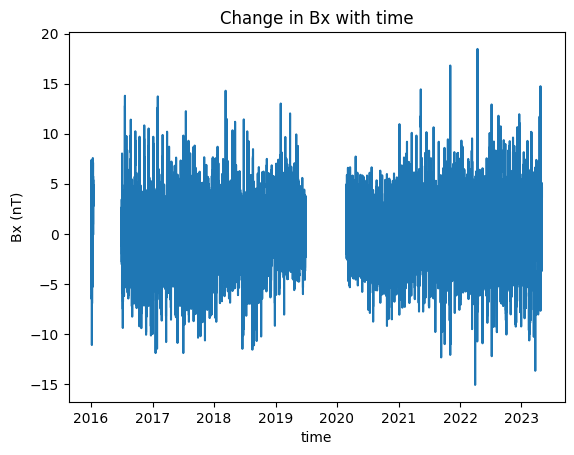

In [10]:
# Figure of Bx with time
date = data.iloc[:, 0]
plt.title('Change in Bx with time')
plt.xlabel('time')
plt.ylabel('Bx (nT)')
plt.plot(date, Bx)
plt.show()

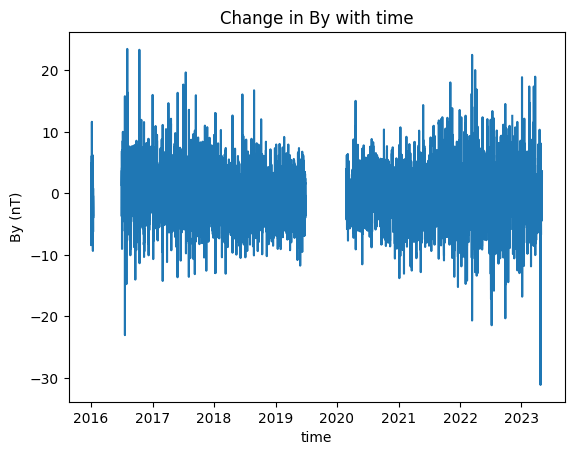

In [11]:
# Figure of By with time
date = data.iloc[:, 0]
plt.title('Change in By with time')
plt.xlabel('time')
plt.ylabel('By (nT)')
plt.plot(date, By)
plt.show()

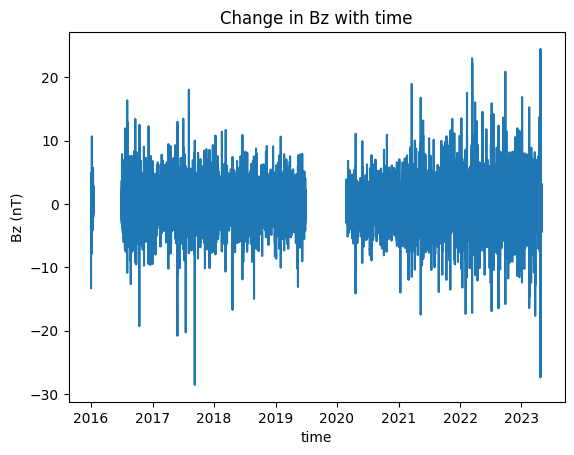

In [12]:
# Figure of Bz with time
date = data.iloc[:, 0]
plt.plot(date, Bz)
plt.title('Change in Bz with time')
plt.xlabel('time')
plt.ylabel('Bz (nT)')
plt.show()

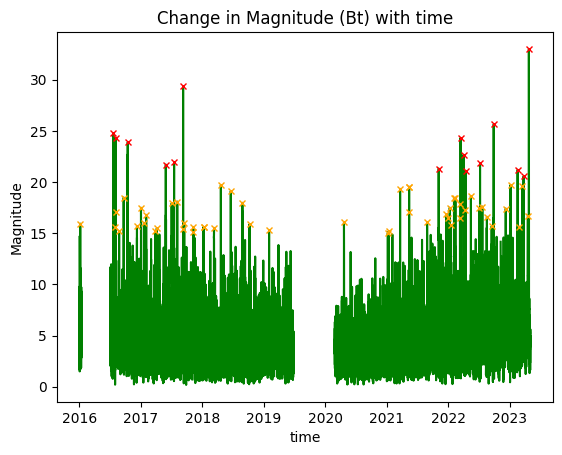

In [13]:
# Locate the Peaks above a Magnitude of 20
peaks, _ = find_peaks(data['magnitude'], height=20.01, prominence=19)
peaks1, _ = find_peaks(data['magnitude'], height=(15,20), prominence=10)
# Figure of magnitude (Bt) with time
date = data.iloc[:, 0]
plt.plot(date, data['magnitude'],color='g')
plt.plot(date[peaks], data['magnitude'][peaks], "x", color='r', markersize=5)
plt.plot(date[peaks1], data['magnitude'][peaks1], "x", color='orange', markersize=5)
plt.title('Change in Magnitude (Bt) with time')
plt.xlabel('time')
plt.ylabel('Magnitude')
plt.show()

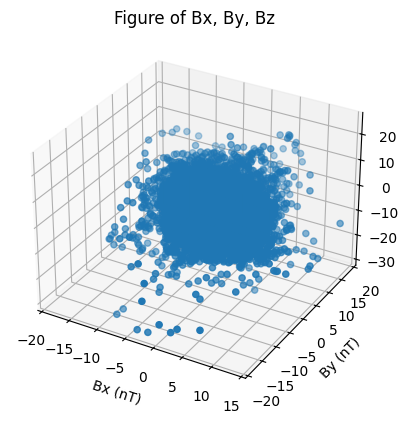

In [14]:
# Figure of Bx, By, Bz
# Matplotlib does not accomodate for third axes (z) but just note that the third axes is for 'Bz'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.xlim(-20, 15)
plt.ylim(-20, 20)
plt.title('Figure of Bx, By, Bz')
plt.xlabel('Bx (nT)')
plt.ylabel('By (nT)')
ax.scatter(Bx, By, Bz)
plt.show()

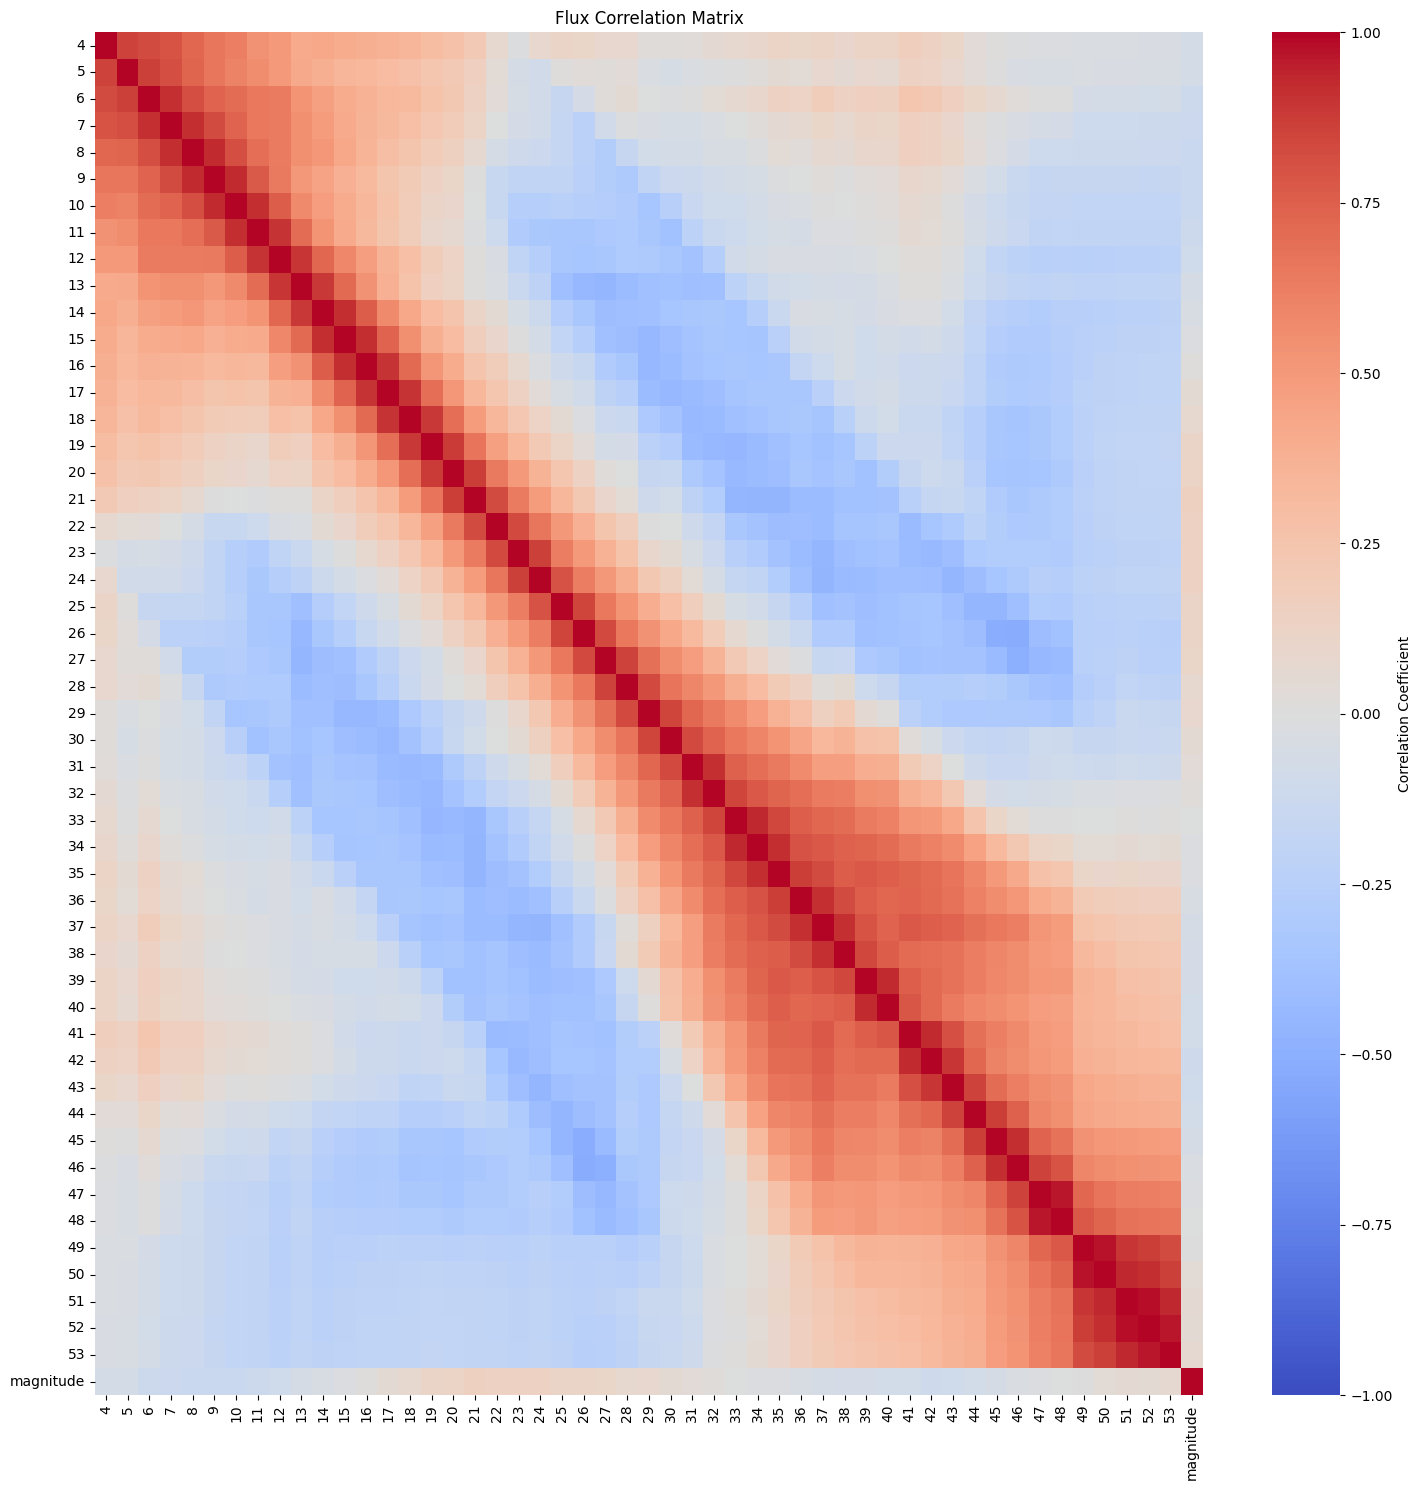

In [15]:
# Drop the 'Time', 'Bx', 'By', and 'Bz' columns to focus on the flux columns
flux_df = data.drop(columns=[0,1,2,3])

# Calculate the correlation matrix
corr_matrix = flux_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Flux Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
# Descriptive statistics for the flux data
print(flux_df.describe())


                  4             5             6             7             8  \
count  26859.000000  28248.000000  30763.000000  32540.000000  34516.000000   
mean      65.118931     22.454076     86.367126     86.865090    115.718110   
std       61.464216     45.791386     74.216536     81.481935    100.777718   
min        0.011586      0.003862      0.011586      0.003862      0.003862   
25%       26.366704      0.233954     36.605815     33.351445     45.811560   
50%       54.990097      8.682991     78.818747     72.923990    100.626740   
75%       91.639484     31.831865    115.480627    114.758092    152.618621   
max     1286.646333   1144.202833   1302.113333   1302.042167   1404.591667   

                  9            10            11            12            13  \
count  36229.000000  38206.000000  39927.000000  41960.000000  43238.000000   
mean     115.649442    156.325382    167.273237    256.261762    224.129034   
std      121.030752    146.062690    166.453569    

In [17]:
# Drop the 'Bx', 'By', and 'Bz' columns to focus on the flux columns
flux_data = data.drop(columns=[1,2,3])

# Set 'Time' as the index for the heatmap
flux_data.set_index(flux_data.columns[0], inplace=True)

#Compute descriptive statistics
stats = flux_data.describe()

# Transpose the result to have the flux types as rows
stats_T = stats.transpose()

# Select specific rows
specific_rows = stats_T.loc[[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,41,42,43,44,45,46,47,48,49,50,51,52,53]]
specific_rows

,count,mean,std,min,25%,50%,75%,max
4,26859.0,65.118931,61.464216,0.011586,26.366704,54.990097,91.639484,1286.646333
5,28248.0,22.454076,45.791386,0.003862,0.233954,8.682991,31.831865,1144.202833
6,30763.0,86.367126,74.216536,0.011586,36.605815,78.818747,115.480627,1302.113333
7,32540.0,86.865090,81.481935,0.003862,33.351445,72.923990,114.758092,1302.042167
8,34516.0,115.718110,100.777718,0.003862,45.811560,100.626740,152.618621,1404.591667
9,36229.0,115.649442,121.030752,0.003862,37.358607,90.268470,145.356900,1633.653000
10,38206.0,156.325382,146.062690,0.003862,56.238295,124.508842,202.810262,1990.126833
11,39927.0,167.273237,166.453569,0.003862,55.450512,127.169383,220.136758,2596.896833
12,41960.0,256.261762,166.502516,0.003862,142.123000,238.249625,332.105304,1819.060667
13,43238.0,224.129034,187.663176,0.003862,98.894206,181.433008,299.211983,2183.549500


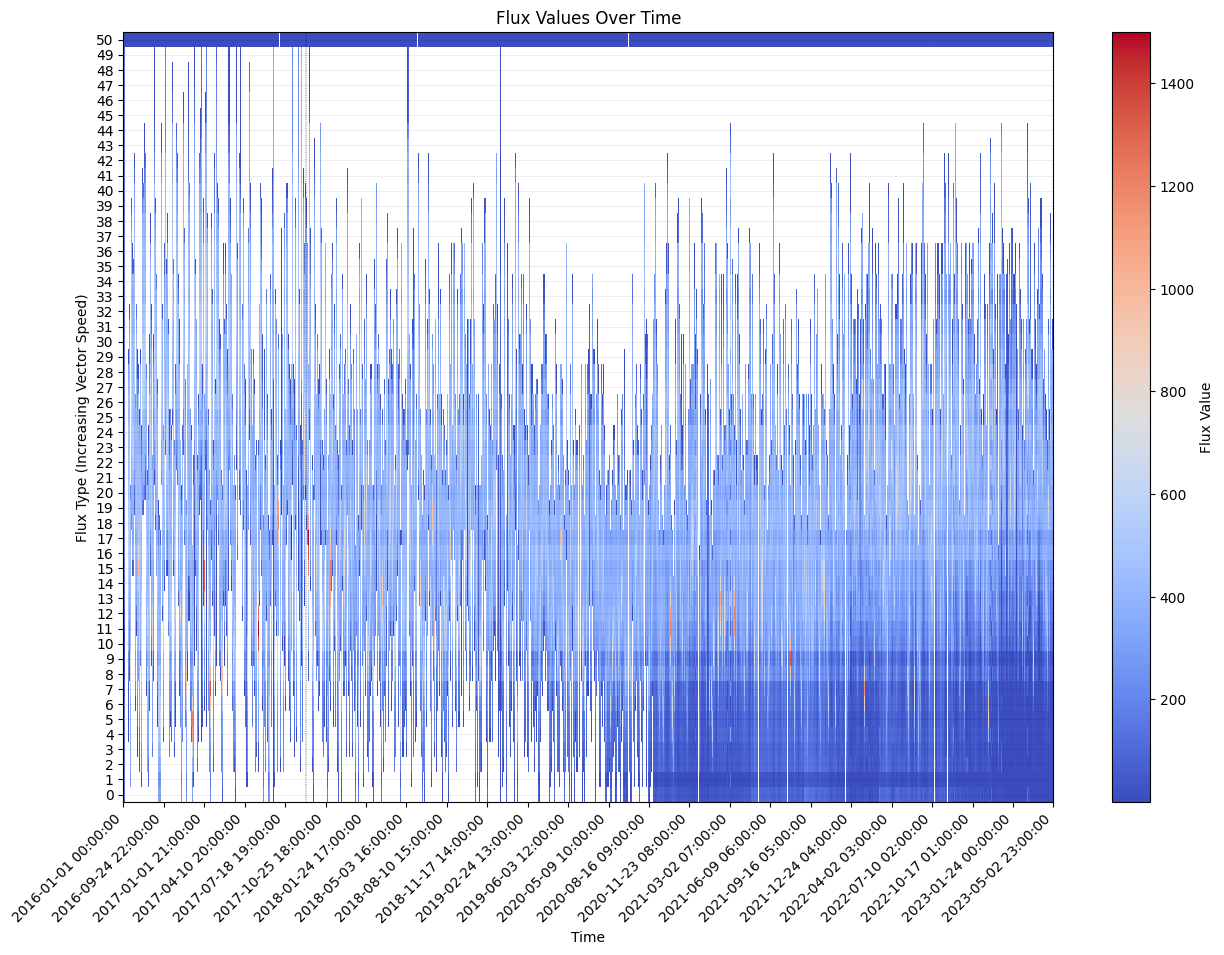

In [18]:
# Normalize the data using Min-Max scaling
#normalized_flux_data = (flux_data - flux_data.min()) / (flux_data.max() - flux_data.min())

# Define color normalization boundaries based on data percentiles
vmin = flux_data.min().min()  # Global minimum value
vmax = 1500 # Global Maximum value

# Plot the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(15, 10))
cax = ax.matshow(flux_data.iloc[:, :].T, cmap='coolwarm', aspect='auto', vmin=vmin, vmax=vmax)

# # Set the x-axis limits (COMMENT this block if the entire year is desired)
# start_date = '2017-09-06' # Pre Solar flare event
# end_date = '2017-09-10' # Post Solar flare and the proceding geo-magnetic storm even has ended
# start_pos = flux_data.index.get_loc(pd.Timestamp(start_date))
# end_pos = flux_data.index.get_loc(pd.Timestamp(end_date))
# ax.set_xlim(start_pos, end_pos)

# # Set x-axis labels based on the specified range
# ax.xaxis.set_ticks_position('bottom')
# num_ticks = 24  # Number of time labels to display
# positions = np.linspace(start_pos, end_pos, num_ticks).astype(int)  # Evenly spaced tick positions within the specified range
# ax.set_xticks(positions)
# ax.set_xticklabels(flux_data.index[positions], rotation=45, ha="right")

#########################

### THIS PART REPLACES THE COMMENTED CODE ABOVE WHICH GIVES THE X AXIS A SPECIFIC START AND END DATE

# Set x-axis labels based on the entire data range
ax.xaxis.set_ticks_position('bottom')
num_ticks = 24  # Number of time labels to display

# Since you want the entire range, start_pos would be the first index and end_pos would be the last
start_pos = 0
end_pos = len(flux_data) - 1

positions = np.linspace(start_pos, end_pos, num_ticks).astype(int)  # Evenly spaced tick positions within the entire range
ax.set_xticks(positions)
ax.set_xticklabels(flux_data.index[positions], rotation=45, ha="right")

##########################


# Reverse the y-axis to have 0 at the bottom and higher vector speeds at the top
ax.set_ylim(ax.get_ylim()[::-1])  # Inverting the y-axis limits

# Add horizontal grid lines for each vector speed
ax.yaxis.set_ticks(np.arange(0, len(flux_data.columns), 1))
ax.grid(which='both', axis='y', linestyle='-', linewidth=0.5, color='k', alpha=0.1)

# Draw vertical grid lines for the specific dates in 2017 to check if the flux is corrolated to the 8th biggest solar flare event X9.3 2017-09-06 11:53am start time
specific_dates_2017 = ["2017-09-06 12:00:00", "2017-09-09 00:00:00"]
positions_2017 = [flux_data.index.get_loc(pd.Timestamp(date)) for date in specific_dates_2017]
for position in positions_2017:
    ax.axvline(x=position, linewidth=0.6, color='k',linestyle=':', alpha=0.4)

# Colorbar representing the actual range of flux values
colorbar = plt.colorbar(cax, label='Flux Value')

plt.title('Flux Values Over Time')
plt.xlabel('Time')
plt.ylabel('Flux Type (Increasing Vector Speed)')
plt.show()